In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

import scipy
from scipy.signal import butter, lfilter

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='highpass')
    return b, a

def butter_highpass_filter(data, highcut, fs, order=5):
    b, a = butter_highpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def charge_from_tt(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+3000, fs = 10**6, order=5)
    filtfilt = butter_highpass_filter(filt, centre_freq-3000, fs = 10**6, order=5)
    mod = filtfilt*drive
    mod_filt = butter_lowpass_filter(mod, 1, fs = 10**6, order=2)
    return mod_filt

def charge_from_tt2(signal, drive, centre_freq):
    filt = butter_lowpass_filter(signal, centre_freq+10000, fs = 10**6, order=3)
    filtfilt = butter_highpass_filter(filt, centre_freq-10000, fs = 10**6, order=3)
    fftsig = scipy.fft.rfft(filtfilt)
    fftdrive = scipy.fft.rfft(drive)
    corr = fftsig*np.conjugate(fftdrive)
    charge = max(corr, key = abs)
    return charge

In [104]:
data  = sio.loadmat('D:\\Experiment\\Charging\\20231108\\Charging3.mat')

In [105]:
signal = np.transpose(data['B'])[0]
#drive = np.transpose(data['F'])[0]

In [83]:
charge_l = []
for i in range(0, 500, 1):
    charge = charge_from_tt2(signal[i*100000:(i+1)*100000], drive[i*100000:(i+1)*100000], 35000)
    charge_l.append(charge)

In [106]:
len(signal)/10**5

1000.0

In [116]:
amp = []
PSD_l = []
for i in range(250):
    PSD = scisig.welch(signal[i*4*10**5:(i+1)*4*10**5], fs = 10**6, nperseg = 10**4)
    PSD_l.append(PSD[1])
    amp.append(np.sqrt(PSD[1][380]))

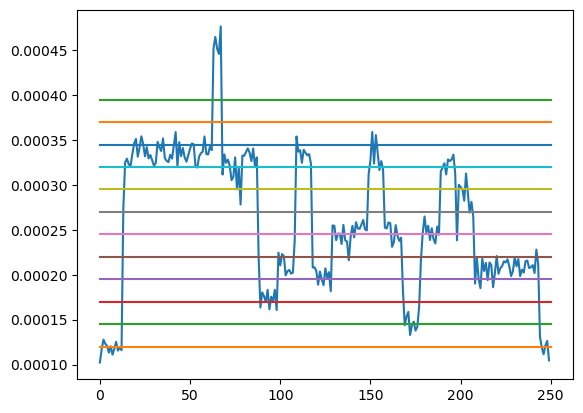

In [118]:
plt.plot(amp)
for i in range(12):
    plt.plot([0, 250], [i*0.000025+0.00012, i*0.000025+0.00012])

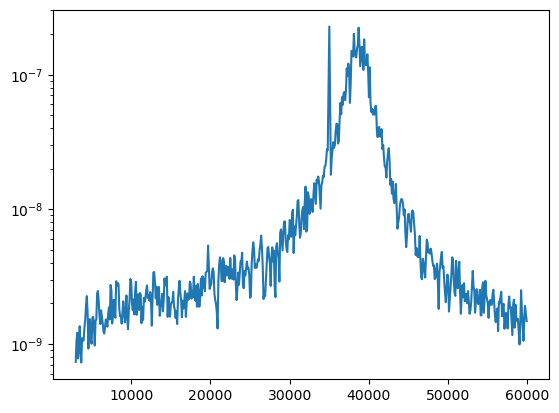

In [87]:
lb = 30
ub = 600
plt.plot(PSD[0][lb:ub], PSD_l[400][lb:ub])
plt.yscale('log')

In [ ]:
7e-8 #@ 1Vpkpk
2e-7

In [89]:
np.sqrt(7e-8)/np.sqrt(2e-7)*20


11.832159566199232